### Tutorial: Solving 2D Laplace's equation:
#### Using: Jacobi, Gauss-Seidel and Red-Black Gauss-Seidel


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Jacobi_2D(sol):
    Niter,Nx,Ny = sol.shape
    for iter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[iter,i,j] = 0.25*(sol[iter-1,i+1,j]+sol[iter-1,i-1,j]
                                     +sol[iter-1,i,j+1]+sol[iter-1,i,j-1])
    return sol

In [3]:
def Gauss_Seidel_2D(sol):
    Niter,Nx,Ny = sol.shape
    for iter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                sol[iter,i,j] = 0.25*(sol[iter-1,i+1,j]+sol[iter,i-1,j]
                                     +sol[iter-1,i,j+1]+sol[iter,i,j-1])
    return sol

In [4]:
def Red_Black_Gauss_Seidel_2D(sol):
    Niter,Nx,Ny = sol.shape
    for iter in range(1,Niter,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                if (i+j)%2==0:
                    sol[iter,i,j] = 0.25*(sol[iter-1,i+1,j]+sol[iter-1,i-1,j]+sol[iter-1,i,j-1]+sol[iter-1,i,j+1])
        for i in range(1,Nx-1,1):
            for j in range(1,Ny-1,1):
                if (i+j)%2!=0:
                    sol[iter,i,j] = 0.25*(sol[iter,i+1,j]+sol[iter,i-1,j]+sol[iter,i,j-1]+sol[iter,i,j+1])
    return sol

In [5]:
Nx    = 100
Ny    = 100
xmax  = 10
xmin  = 0
ymax  = 10
ymin  = 0
Niter = 200

x     = np.linspace(xmin,xmax,Nx)
y     = np.linspace(ymin,ymax,Ny)

x_mesh,y_mesh = np.meshgrid(x,y)

sol        = np.zeros(((Niter,len(x),len(y))))
sol[0,:,:] = np.sin(3*np.pi*x_mesh/(xmax-xmin)) + np.sin(3*np.pi*y_mesh/(ymax-ymin))

sol_GS        = np.zeros(((Niter,len(x),len(y))))
sol_GS[0,:,:] = np.sin(3*np.pi*x_mesh/(xmax-xmin)) + np.sin(3*np.pi*y_mesh/(ymax-ymin))

sol_RB_GS        = np.zeros(((Niter,len(x),len(y))))
sol_RB_GS[0,:,:] = np.sin(3*np.pi*x_mesh/(xmax-xmin)) + np.sin(3*np.pi*y_mesh/(ymax-ymin))

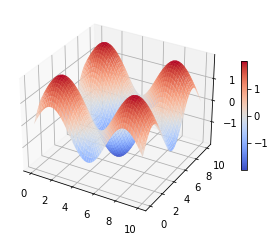

In [6]:
fig  = plt.figure(0)
axes = fig.add_subplot(projection='3d')
surf = axes.plot_surface(x_mesh, y_mesh, sol[0],cmap='coolwarm')
fig.colorbar(surf, shrink=0.5, aspect=20)
plt.show()

In [7]:
sol       = Jacobi_2D(sol)
sol_GS    = Gauss_Seidel_2D(sol_GS)
sol_RB_GS = Red_Black_Gauss_Seidel_2D(sol_RB_GS)

<IPython.core.display.Javascript object>


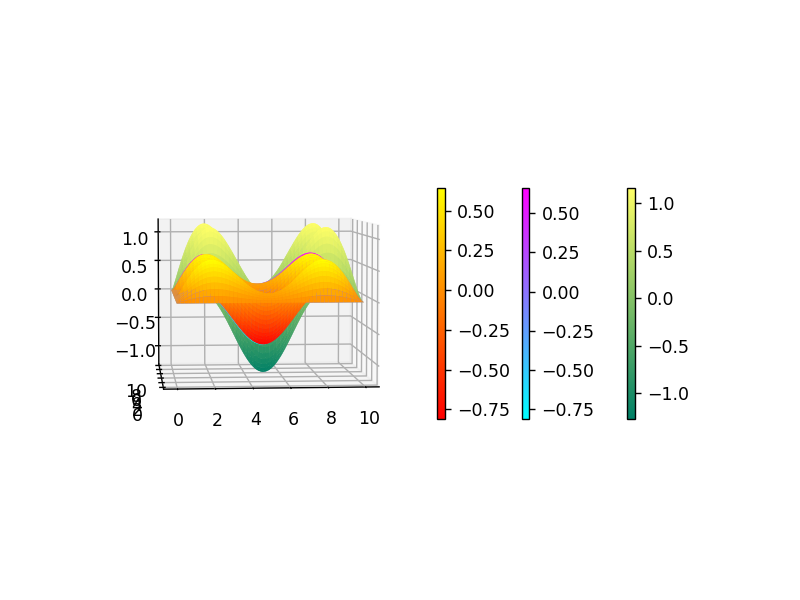

In [8]:
%matplotlib notebook
fig  = plt.figure(1)
axes = fig.add_subplot(projection='3d')
surf1 = axes.plot_surface(x_mesh, y_mesh, sol[-1],      cmap='summer')
surf2 = axes.plot_surface(x_mesh, y_mesh, sol_GS[-1],   cmap='cool')
surf3 = axes.plot_surface(x_mesh, y_mesh, sol_RB_GS[-1],cmap='autumn')
fig.colorbar(surf1, shrink=0.5, aspect=30)
fig.colorbar(surf2, shrink=0.5, aspect=30)
fig.colorbar(surf3, shrink=0.5, aspect=30)
plt.show()